In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

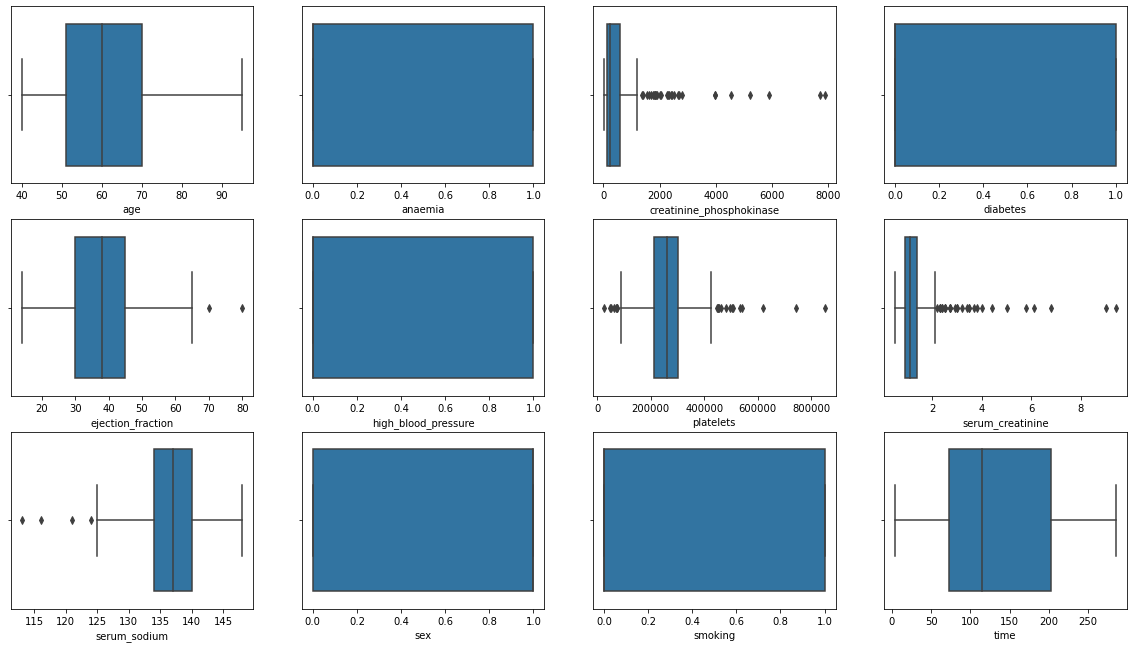

In [4]:
#Mencari data pencilan

def plot_Outlier(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        ax=sns.boxplot(x = df[var])   
    plt.show()
    
plot_Outlier(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])

[0.09432983 0.02420062 0.07358555 0.03182375 0.12569396 0.02480486
 0.07235371 0.12673387 0.08145492 0.02668462 0.02760673 0.29072757]


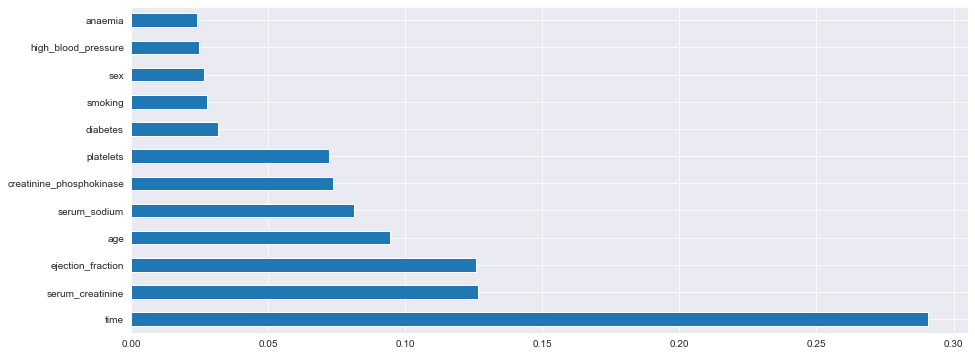

In [5]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

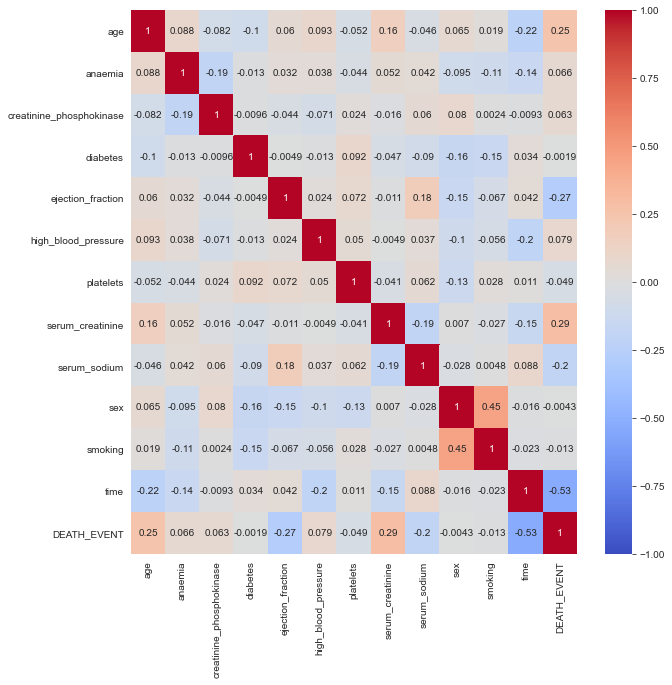

In [6]:
# Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

Text(0, 0.5, 'Count')

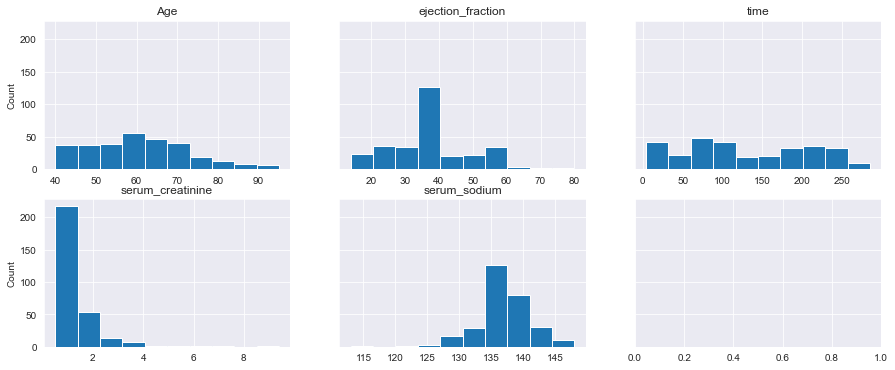

In [7]:
fig, ax = plt.subplots(2,3,sharey=True)

ax[0,0].hist(df['age'])
ax[0,1].hist(df['ejection_fraction'])
ax[0,2].hist(df['time'])
ax[1,0].hist(df['serum_creatinine'])
ax[1,1].hist(df['serum_sodium'])

ax[0,0].set_title('Age')
ax[0,1].set_title('ejection_fraction')
ax[0,2].set_title('time')
ax[1,0].set_title('serum_creatinine')
ax[1,1].set_title('serum_sodium')

ax[0,0].set_ylabel('Count')
ax[1,0].set_ylabel('Count')

In [8]:
# korelasi dengan death event
corr = df.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [9]:
# modelling

features = ['age','serum_creatinine','time','ejection_fraction','serum_sodium']
x = df[features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

In [10]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
y_pred = r_clf.predict(x_test)
r_acc = r_clf.score(x_test,y_test)

In [11]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
r_acc

0.95

In [13]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[45  2]
 [ 1 12]]


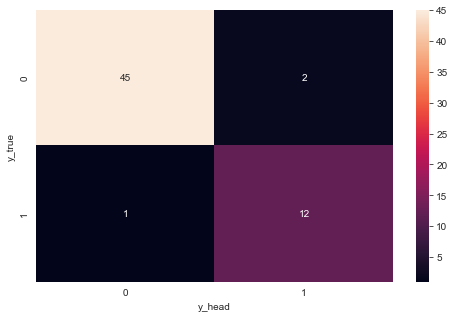

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [15]:
TP = 45
FP = 2
FN = 1
TN = 12

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.86      0.92      0.89        13

    accuracy                           0.95        60
   macro avg       0.92      0.94      0.93        60
weighted avg       0.95      0.95      0.95        60



In [17]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1score = 2*precision*recall/(precision+recall)

# Seberapa baik model dalam memprediksi seorang pasien mempunyai status positive
print('presisi :',precision)
print('recall :',recall)
print('f1 score :',f1score)

presisi : 0.9574468085106383
recall : 0.9782608695652174
f1 score : 0.967741935483871


In [18]:
precision = TN/(TN+FN)
recall = TN/(TN+FP)
f1score = (2*precision*recall)/(precision+recall)

# Seberapa baik model dalam memprediksi seorang pasien mempunyai status negatif
print('presisi :',precision)
print('recall :',recall)
print('f1 score :',f1score)


presisi : 0.9230769230769231
recall : 0.8571428571428571
f1 score : 0.888888888888889


In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [21]:
dt_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
dt_acc

0.9333333333333333

In [24]:
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, dt_pred)
print(cm)

[[46  1]
 [ 3 10]]


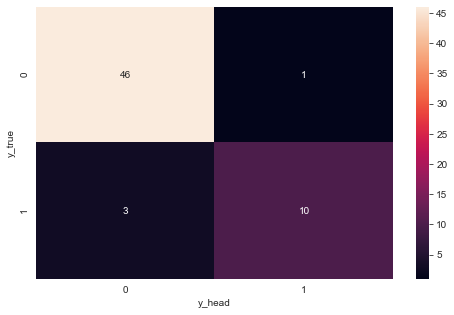

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [27]:
TP = 46
FP = 1
FN = 3
TN = 10

In [30]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.91      0.77      0.83        13

    accuracy                           0.93        60
   macro avg       0.92      0.87      0.90        60
weighted avg       0.93      0.93      0.93        60



In [31]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1score = 2*precision*recall/(precision+recall)

# Seberapa baik model dalam memprediksi seorang pasien mempunyai status positive
print('presisi :',precision)
print('recall :',recall)
print('f1 score :',f1score)

presisi : 0.9787234042553191
recall : 0.9387755102040817
f1 score : 0.9583333333333333


In [32]:
precision = TN/(TN+FN)
recall = TN/(TN+FP)
f1score = (2*precision*recall)/(precision+recall)

# Seberapa baik model dalam memprediksi seorang pasien mempunyai status negatif
print('presisi :',precision)
print('recall :',recall)
print('f1 score :',f1score)

presisi : 0.7692307692307693
recall : 0.9090909090909091
f1 score : 0.8333333333333333
